In [2]:
from egg.zoo.pop.scripts.graph_tools.acc_graphs import check_constraints, metadata_opener, extract_param, text_to_acc, graph_collector #, acc_to_graph
from pathlib import Path
import os
import glob
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


In [3]:
def acc_graph(
    xs,
    ys,
    labels,
    save_path="~/graphs",
    verbose=False,
    name="graph.png",
    title="train_acc",
    legend_title=None,
    colours=None,
    linestyles=None,
):
    # TODO : add a better file naming system, preventing overwrite
    assert len(xs) == len(ys) == len(labels)
    for i in range(len(xs)):
        if verbose:
            print(f"adding {labels[i]} to graph")
        plt.plot(
            xs[i],
            ys[i],
            label=labels[i],
            c=colours[i] if colours is not None else None,
            linestyle=linestyles[i] if linestyles is not None else None,
        )
        plt.legend(title=legend_title)
        plt.title(title)
    
    custom_lines = [Line2D([0], [0], color="tab:blue", lw=4),
                Line2D([0], [0], color="tab:purple", lw=4),
                Line2D([0], [0], color="tab:pink", lw=4),
                Line2D([0], [0], color="tab:red", lw=4)]
    plt.legend(custom_lines, ['CNN learner', 'Attention based learner', 'dino (self-supervised attention)','one on one baseline'])
    plt.show()
    # plt.savefig(os.path.join(save_path, name))
    # plt.clf()

In [4]:
def fit(x):
    new_x = []
    for i,gr in enumerate(x):
        #if len(gr)== len(x[0]):
        _max = len(gr)*100 # if len(gr) > len(x[0]) else len(x[0])*100
        _step = int(_max/len(gr))
        new_x.append([i for i in range(0,_max,_step)])
        #else:
        #    print(f"{i}th data sequence has {len(gr)} elements and not {len(x[0])}")
            
    return new_x

48 1


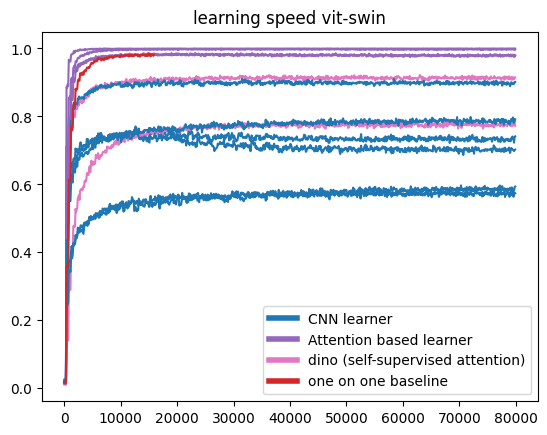

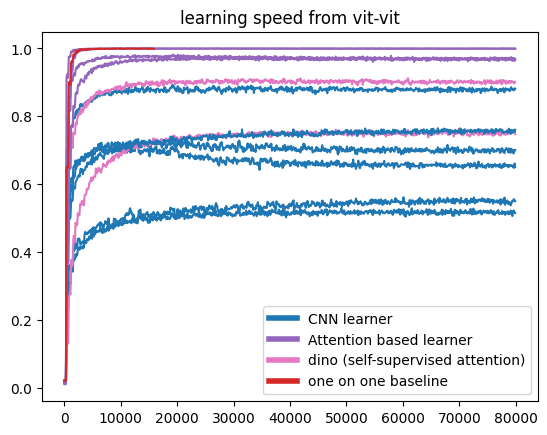

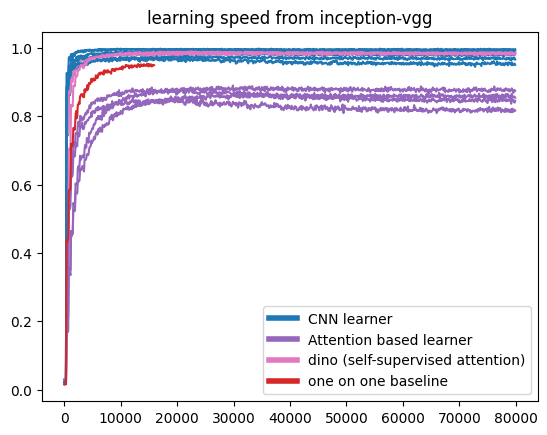

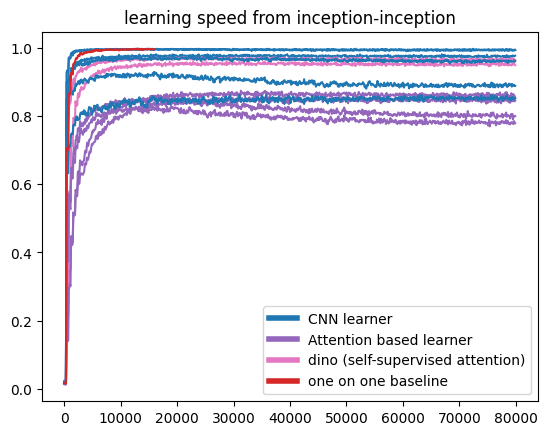

In [18]:
x,y,z = graph_collector("/homedtcl/mmahaut/projects/experiments/cont_step_2",label_names=["base_checkpoint_path","additional_sender","additional_receiver"])
x2,y2,z2 = graph_collector("/homedtcl/mmahaut/projects/experiments/cont_het_seeded",label_names=["vision_model_names_senders","vision_model_names_recvs"], names=["vision_model_names_senders","vision_model_names_recvs"], values=[[['vit']],[['swin']]])
x3,y3,z3 = graph_collector("/homedtcl/mmahaut/projects/experiments/cont_het_seeded",label_names=["vision_model_names_senders","vision_model_names_recvs"], names=["vision_model_names_senders","vision_model_names_recvs"], values=[[['vit']],[['vit']]])
x4,y4,z4 = graph_collector("/homedtcl/mmahaut/projects/experiments/cont_het_seeded",label_names=["vision_model_names_senders","vision_model_names_recvs"], names=["vision_model_names_senders","vision_model_names_recvs"], values=[[['vgg11']],[['inception']]])
x5,y5,z5 = graph_collector("/homedtcl/mmahaut/projects/experiments/cont_het_seeded",label_names=["vision_model_names_senders","vision_model_names_recvs"], names=["vision_model_names_senders","vision_model_names_recvs"], values=[[['inception']],[['inception']]])

print(len(x), len(x2))
#for i in range(len(x2)):
 #   x2[i] = x2[i][:160]
  #  y2[i] = y2[i][:160]
   # z2[i] = z2[i][:160]
c = []
x_a, y_a, z_a, c_a= [],[],[],[]
x_b, y_b, z_b, c_b= [],[],[],[]
x_c, y_c, z_c, c_c= [],[],[],[]
x_d, y_d, z_d, c_d= [],[],[],[]

for i,_z in enumerate(z):
    if "198634" in _z:
        x_a.append(x[i])
        y_a.append(y[i])
        z_a.append(_z.split("-",1)[1])
        c_a.append("tab:purple" if "swin" in z_a[-1] or "vit" in z_a[-1] else "tab:pink" if "dino" in z_a[-1] else "tab:blue")
    elif "198629" in _z:
        x_b.append(x[i])
        y_b.append(y[i])
        z_b.append(_z.split("-",1)[1])
        c_b.append("tab:purple" if "swin" in z_b[-1] or "vit" in z_b[-1] else "tab:pink" if "dino" in z_b[-1] else "tab:blue")
    elif "198638" in _z:
        x_c.append(x[i])
        y_c.append(y[i])
        z_c.append(_z.split("-",1)[1])
        c_c.append("tab:purple" if "swin" in z_c[-1] or "vit" in z_c[-1] else "tab:pink" if "dino" in z_c[-1] else "tab:blue")
    else:
        x_d.append(x[i])
        y_d.append(y[i])
        z_d.append(_z.split("-",1)[1])
        c_d.append("tab:purple" if "swin" in z_d[-1] or "vit" in z_d[-1] else "tab:pink" if "dino" in z_d[-1] else "tab:blue")

x_a += x2
y_a += y2
z_a += z2

x_b += x3
y_b += y3
z_b += z3

x_c += x4
y_c += y4
z_c += z4

x_d += x5
y_d += y5
z_d += z5

c_a += ["tab:red"] * len(z2)
c_b += ["tab:red"] * len(z2)
c_c += ["tab:red"] * len(z2)
c_d += ["tab:red"] * len(z2)

#z = [""] * (len(z) +len(z2))


#z[-len(z2)] = "6-6 pop develops language from scratch"
#z[-len(z2) - 1] = "new agent on 1-1 pretrained language "

#print(x)
acc_graph(fit(x_a),y_a,z_a,"./",colours=c_a, title="learning speed vit-swin")
acc_graph(fit(x_b),y_b,z_b,"./",colours=c_b, title="learning speed from vit-vit")
acc_graph(fit(x_c),y_c,z_c,"./",colours=c_c, title="learning speed from inception-vgg")
acc_graph(fit(x_d),y_d,z_d,"./",colours=c_d, title="learning speed from inception-inception")


In [5]:
x,y,_ = graph_collector("/homedtcl/mmahaut/projects/experiments/cont_fuller_pop")
new_x = []
for i,gr in enumerate(x):
    _max = len(gr)*100 if len(gr) > len(x[0]) else len(x[0])*100
    _step = int(_max/len(gr))
    new_x.append([i for i in range(0,_max,_step)])
#print(x)
limit = 10
acc_graph(new_x[:limit],y[:limit],[None] * limit,"./")


AssertionError: 

In [3]:
import torch
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from egg.zoo.pop.scripts.analysis_tools.analysis import interaction_to_dataframe, name_to_idx, extract_name

/homedtcl/mmahaut/.conda/envs/omelette/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# Path to your interaction files
base_path = "/homedtcl/mmahaut/projects/experiments/int_fuller_gaussian"

models = ['vgg11','vit','resnet152', 'inception','swin','dino']
# interaction_files = [f"None['{model1}']['{model2}']" for model1 in models for model2 in models]
interaction_files = glob.glob(base_path + "/gaussian*")
# interaction_files.append("fullerpop")
# interaction_files.append("fullpop")

for _if in interaction_files:
    print(interaction_files)

inters = [torch.load(file) for file in interaction_files]
df_inters = [interaction_to_dataframe(inter) for inter in inters]

["/homedtcl/mmahaut/projects/experiments/int_fuller_gaussian/gaussian_noise['resnet152']['vit']", "/homedtcl/mmahaut/projects/experiments/int_fuller_gaussian/gaussian_noise['vit']['dino']", "/homedtcl/mmahaut/projects/experiments/int_fuller_gaussian/gaussian_noise['inception']['vgg11']", "/homedtcl/mmahaut/projects/experiments/int_fuller_gaussian/gaussian_noise['vit']['inception']", "/homedtcl/mmahaut/projects/experiments/int_fuller_gaussian/gaussian_noise['swin']['dino']", "/homedtcl/mmahaut/projects/experiments/int_fuller_gaussian/gaussian_noise['vgg11']['inception']", "/homedtcl/mmahaut/projects/experiments/int_fuller_gaussian/gaussian_noise['swin']['swin']", "/homedtcl/mmahaut/projects/experiments/int_fuller_gaussian/gaussian_noise['vgg11']['swin']", "/homedtcl/mmahaut/projects/experiments/int_fuller_gaussian/gaussian_noise['resnet152']['dino']", "/homedtcl/mmahaut/projects/experiments/int_fuller_gaussian/gaussian_noise['dino']['inception']", "/homedtcl/mmahaut/projects/experiments

In [5]:
one_one_accs = torch.empty((len(models),len(models)))
_accs = None
print(one_one_accs)
for i, df_inter in enumerate(df_inters):
    acc = (df_inter.batch_number % 64 == df_inter.receiver_output).mean().item()
    if df_inter.sender_idx.nunique() != 1 and df_inter.recv_idx.nunique() != 1:
        print(f"---------- {interaction_files[i]} ----------")
        print(f"average accuracy = {acc}")
        print(f"{df_inter.sender_idx.nunique()} sender, {df_inter.recv_idx.nunique()} receivers")
        _accs = torch.empty((df_inter.sender_idx.nunique(),df_inter.recv_idx.nunique()))
        for sidx in range(df_inter.sender_idx.nunique()):
            for ridx in range(df_inter.recv_idx.nunique()):
                select_inters = df_inter[df_inter.sender_idx == sidx][df_inter.recv_idx == ridx]
                _acc = (select_inters.batch_number % 64 == select_inters.receiver_output).mean().item()
                _accs[sidx][ridx] = _acc
                
    else :
        _indexes = [name_to_idx(name) for name in extract_name(interaction_files[i])]
        #assert one_one_accs[_indexes[0]][_indexes[1]] == 0, f"tried to put value in non-empty slot : got {one_one_accs[_indexes[0]][_indexes[1]]}"
        one_one_accs[_indexes[0]][_indexes[1]] = acc
print(one_one_accs)
print(_accs)


tensor([[1.0386e+21, 6.6449e-07, 2.6554e-06, 2.3880e-18, 3.1360e+27, 7.0800e+31],
        [3.1095e-18, 4.7851e+22, 2.8826e+32, 4.4248e+30, 7.6729e+34, 2.1707e-18],
        [4.5447e+30, 7.0062e+22, 2.1715e-18, 4.2582e+24, 3.3130e-18, 1.2845e+31],
        [1.8395e+25, 6.1963e-04, 1.2996e+22, 2.7083e+23, 5.1122e+22, 1.7280e-04],
        [1.0314e-08, 5.2011e+22, 2.6078e+20, 1.7062e-07, 2.4040e-18, 1.1963e+22],
        [3.1097e-18, 9.4370e-09, 1.0129e-11, 6.3018e-10, 4.1288e-08, 6.7593e-04]])
---------- /homedtcl/mmahaut/projects/experiments/int_fuller_gaussian/gaussian_noise['vgg11','vit','resnet152', 'inception','swin','dino']['vgg11','vit','resnet152', 'inception','swin','dino'] ----------
average accuracy = 0.017776602285879628
6 sender, 6 receivers


/tmp/ipykernel_255426/929327393.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  select_inters = df_inter[df_inter.sender_idx == sidx][df_inter.recv_idx == ridx]


tensor([[2.0850e-02, 1.5473e-02, 1.5875e-02, 1.5815e-02, 1.5712e-02, 1.5527e-02],
        [1.5701e-02, 3.5802e-02, 1.5641e-02, 1.5647e-02, 1.5847e-02, 1.5858e-02],
        [1.5430e-02, 1.5408e-02, 2.2260e-02, 1.5592e-02, 1.5712e-02, 1.5837e-02],
        [1.5533e-02, 1.5652e-02, 1.5972e-02, 8.5645e-02, 1.5809e-02, 1.6260e-02],
        [1.5696e-02, 5.2011e+22, 1.5658e-02, 1.5723e-02, 3.1217e-02, 1.5809e-02],
        [3.1097e-18, 1.5793e-02, 1.0129e-11, 1.5560e-02, 4.1288e-08, 6.7593e-04]])
tensor([[0.0183, 0.0156, 0.0156, 0.0157, 0.0158, 0.0156],
        [0.0157, 0.0347, 0.0156, 0.0158, 0.0157, 0.0158],
        [0.0157, 0.0157, 0.0230, 0.0157, 0.0159, 0.0157],
        [0.0157, 0.0157, 0.0158, 0.0511, 0.0156, 0.0156],
        [0.0157, 0.0156, 0.0158, 0.0158, 0.0208, 0.0158],
        [0.0157, 0.0158, 0.0158, 0.0157, 0.0159, 0.0203]])


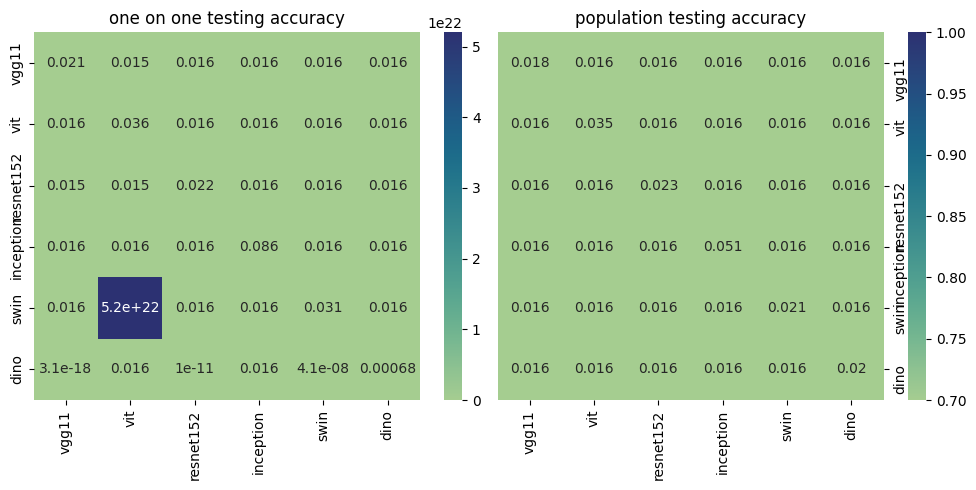

In [6]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True

df1 = pd.DataFrame(one_one_accs, columns=models, index=models)
df2 = pd.DataFrame(_accs, columns=models, index=models)

fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.subplots_adjust(wspace=0.01)

sns.heatmap(df1, cmap="crest", ax=ax1, cbar=True, annot=True)
sns.heatmap(df2, cmap="crest", ax=ax2, vmax=1, vmin = 0.7, cbar=True, annot=True)


ax2.yaxis.tick_right()
ax1.set_title('one on one testing accuracy')
ax2.set_title('population testing accuracy')

fig.subplots_adjust(wspace=0.001)
plt.show()


df_heatmap = pd.DataFrame(one_one_accs, columns=models, index=models)
# plot it with seaborn
